ya karena saya pusing ya fren, jadi bikin satu file lagi (:

In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as p
import matplotlib.image as im

In [2]:
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')

df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,15,7,10,2023,Persebaya Surabaya,2,8,0,22,Persib Bandung,3,8,3,27,Gelora Bung Tomo,Surabaya
131,15,7,10,2023,Persija Jakarta,1,8,1,20,PS Barito Putera,1,8,1,22,Patriot Chandra Bhaga,Bekasi
132,15,8,10,2023,PSM Makassar,0,6,0,18,Madura United FC,2,8,3,30,Gelora B. J. Habibie,Pare-pare
133,15,8,10,2023,Persita Tangerang,2,8,1,15,Persik Kediri,2,8,1,19,Indomilk Arena,Tangerang


In [3]:
# di-run buat keterangan aja
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

# tables at certain gameweek

In [4]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [5]:
points = []
hgf=[]
agf=[]
hga=[]
aga=[]
win=[]
draw=[]
lose=[]
played=[]
pekanke=15 # PEKAN KE
for cl in club:
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ]
    
    hgf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    agf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    hga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    aga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    win.append(df[((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))].shape[0])
    draw.append(df[((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))].shape[0])
    lose.append(df[((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))].shape[0])
    
    try:
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke)
    except:
        week = len(df.loc[(df['home']==cl)|(df['away']==cl)]['week'])
        hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==week) ]
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(week)
points

[24, 20, 27, 21, 22, 26, 19, 24, 20, 18, 13, 22, 18, 15, 31, 30, 6, 10]

## home-away pairs

In [6]:
dff=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
dff.columns=dff.columns.droplevel(1)
dff

hscore  ascore  hpoint  apoint
home              away                                               
Arema FC          Bali United FC            1       3       0       3
                  Borneo FC Samarinda       0       1       0       3
                  PS Barito Putera          0       4       0       3
                  PSS Sleman                2       1       3       0
                  Persib Bandung            3       3       1       1
...                                       ...     ...     ...     ...
Rans Nusantara FC PSS Sleman                0       0       1       1
                  Persik Kediri             1       0       3       0
                  Persikabo 1973            2       1       3       0
                  Persis Solo               1       2       0       3
                  Persita Tangerang         0       1       0       3

[135 rows x 4 columns]

## tables

In [7]:
tables = pd.DataFrame ({"Clubs": club, "Played":played, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})

tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting bikinan chatgpt tapi solutip
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

tables

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Borneo FC Samarinda,15,9,4,2,22,13,9,31
2,Madura United FC,15,9,3,3,28,16,12,30
3,Persib Bandung,15,7,6,2,29,20,9,27
4,Rans Nusantara FC,15,7,5,3,19,14,5,26
5,PSIS Semarang,15,7,3,5,21,16,5,24
6,Bali United FC,15,7,3,5,23,20,3,24
7,PS Barito Putera,15,6,4,5,22,15,7,22
8,Persebaya Surabaya,15,6,4,5,19,20,-1,22
9,Dewa United FC,15,5,6,4,20,18,2,21
10,Persija Jakarta,15,4,8,3,19,17,2,20


## sort head-to-head points

In [8]:
# another dataframe
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

for i in range (1,len(sh)+1,1):
    
    try:
        
        if sh['Points'][i]==sh['Points'][i+1]:
            
            h1=dff.index.get_level_values('home')==sh['Clubs'][i]
            a2=dff.index.get_level_values('away')==sh['Clubs'][i+1]
            h2=dff.index.get_level_values('home')==sh['Clubs'][i+1]
            a1=dff.index.get_level_values('away')==sh['Clubs'][i]
            
            i1scr=0
            i2scr=0
        
            game = dff.loc[ ((h1&a2) | (h2&a1)) ]
            
            if len(game)==1:
                
                try:
                    i1scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['hpoint']
                    i2scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['apoint']

                except:
                    i1scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['apoint'] 
                    i2scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['hpoint']
            
            elif len(game)==2:
                i1scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['hpoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['apoint']
                i2scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['apoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['hpoint']
                
            if i1scr < i2scr:
                sh.at[i,'pr']=sh['pr'][i]-1
                sh.at[i+1,'pr']=sh['pr'][i+1]+1
        
    except:
        pass
        
sh

,Clubs,Points,pr
1,Borneo FC Samarinda,31,18
2,Madura United FC,30,17
3,Persib Bandung,27,16
4,Rans Nusantara FC,26,15
5,PSIS Semarang,24,14
6,Bali United FC,24,13
7,PS Barito Putera,22,12
8,Persebaya Surabaya,22,11
9,Dewa United FC,21,10
10,Persija Jakarta,20,9


check standings resulted from priority fixing before sort_values command!

In [9]:
sh=sh.sort_values(by='pr', ascending=False).reset_index(drop=True)
sh

,Clubs,Points,pr
0,Borneo FC Samarinda,31,18
1,Madura United FC,30,17
2,Persib Bandung,27,16
3,Rans Nusantara FC,26,15
4,PSIS Semarang,24,14
5,Bali United FC,24,13
6,PS Barito Putera,22,12
7,Persebaya Surabaya,22,11
8,Dewa United FC,21,10
9,Persija Jakarta,20,9


# points earned or lost at

In [10]:
homepoints  = []
awaypoints  = []
totalpoints = []

for cl in sh['Clubs']:
    
    hpe  = df.loc[(df['home']==cl)]['hpoint'].sum()
    ape  = df.loc[(df['away']==cl)]['apoint'].sum()
    
    homepoints.append(hpe)
    awaypoints.append(ape)
    
    totalpoints.append(hpe+ape)

In [11]:
yep = pd.DataFrame({
    'Club': sh['Clubs'],
    'Home Points': homepoints,
    'Away Points': awaypoints,
    'Total Points': totalpoints,
})
yep

,Club,Home Points,Away Points,Total Points
0,Borneo FC Samarinda,19,12,31
1,Madura United FC,16,14,30
2,Persib Bandung,13,14,27
3,Rans Nusantara FC,14,12,26
4,PSIS Semarang,19,5,24
5,Bali United FC,16,8,24
6,PS Barito Putera,16,6,22
7,Persebaya Surabaya,14,8,22
8,Dewa United FC,15,6,21
9,Persija Jakarta,12,8,20


In [12]:
merg = sh[['Clubs']].merge(tables, left_on="Clubs", right_on="Clubs")
merg = merg.merge(yep, left_on="Clubs", right_on="Club")
merg.drop(columns=["Club"], inplace=True)
merg.index=merg.index+1
merg

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,Away Points,Total Points
1,Borneo FC Samarinda,15,9,4,2,22,13,9,31,19,12,31
2,Madura United FC,15,9,3,3,28,16,12,30,16,14,30
3,Persib Bandung,15,7,6,2,29,20,9,27,13,14,27
4,Rans Nusantara FC,15,7,5,3,19,14,5,26,14,12,26
5,PSIS Semarang,15,7,3,5,21,16,5,24,19,5,24
6,Bali United FC,15,7,3,5,23,20,3,24,16,8,24
7,PS Barito Putera,15,6,4,5,22,15,7,22,16,6,22
8,Persebaya Surabaya,15,6,4,5,19,20,-1,22,14,8,22
9,Dewa United FC,15,5,6,4,20,18,2,21,15,6,21
10,Persija Jakarta,15,4,8,3,19,17,2,20,12,8,20


Text(0, 19.2, 'source: Liga Indonesia Baru')

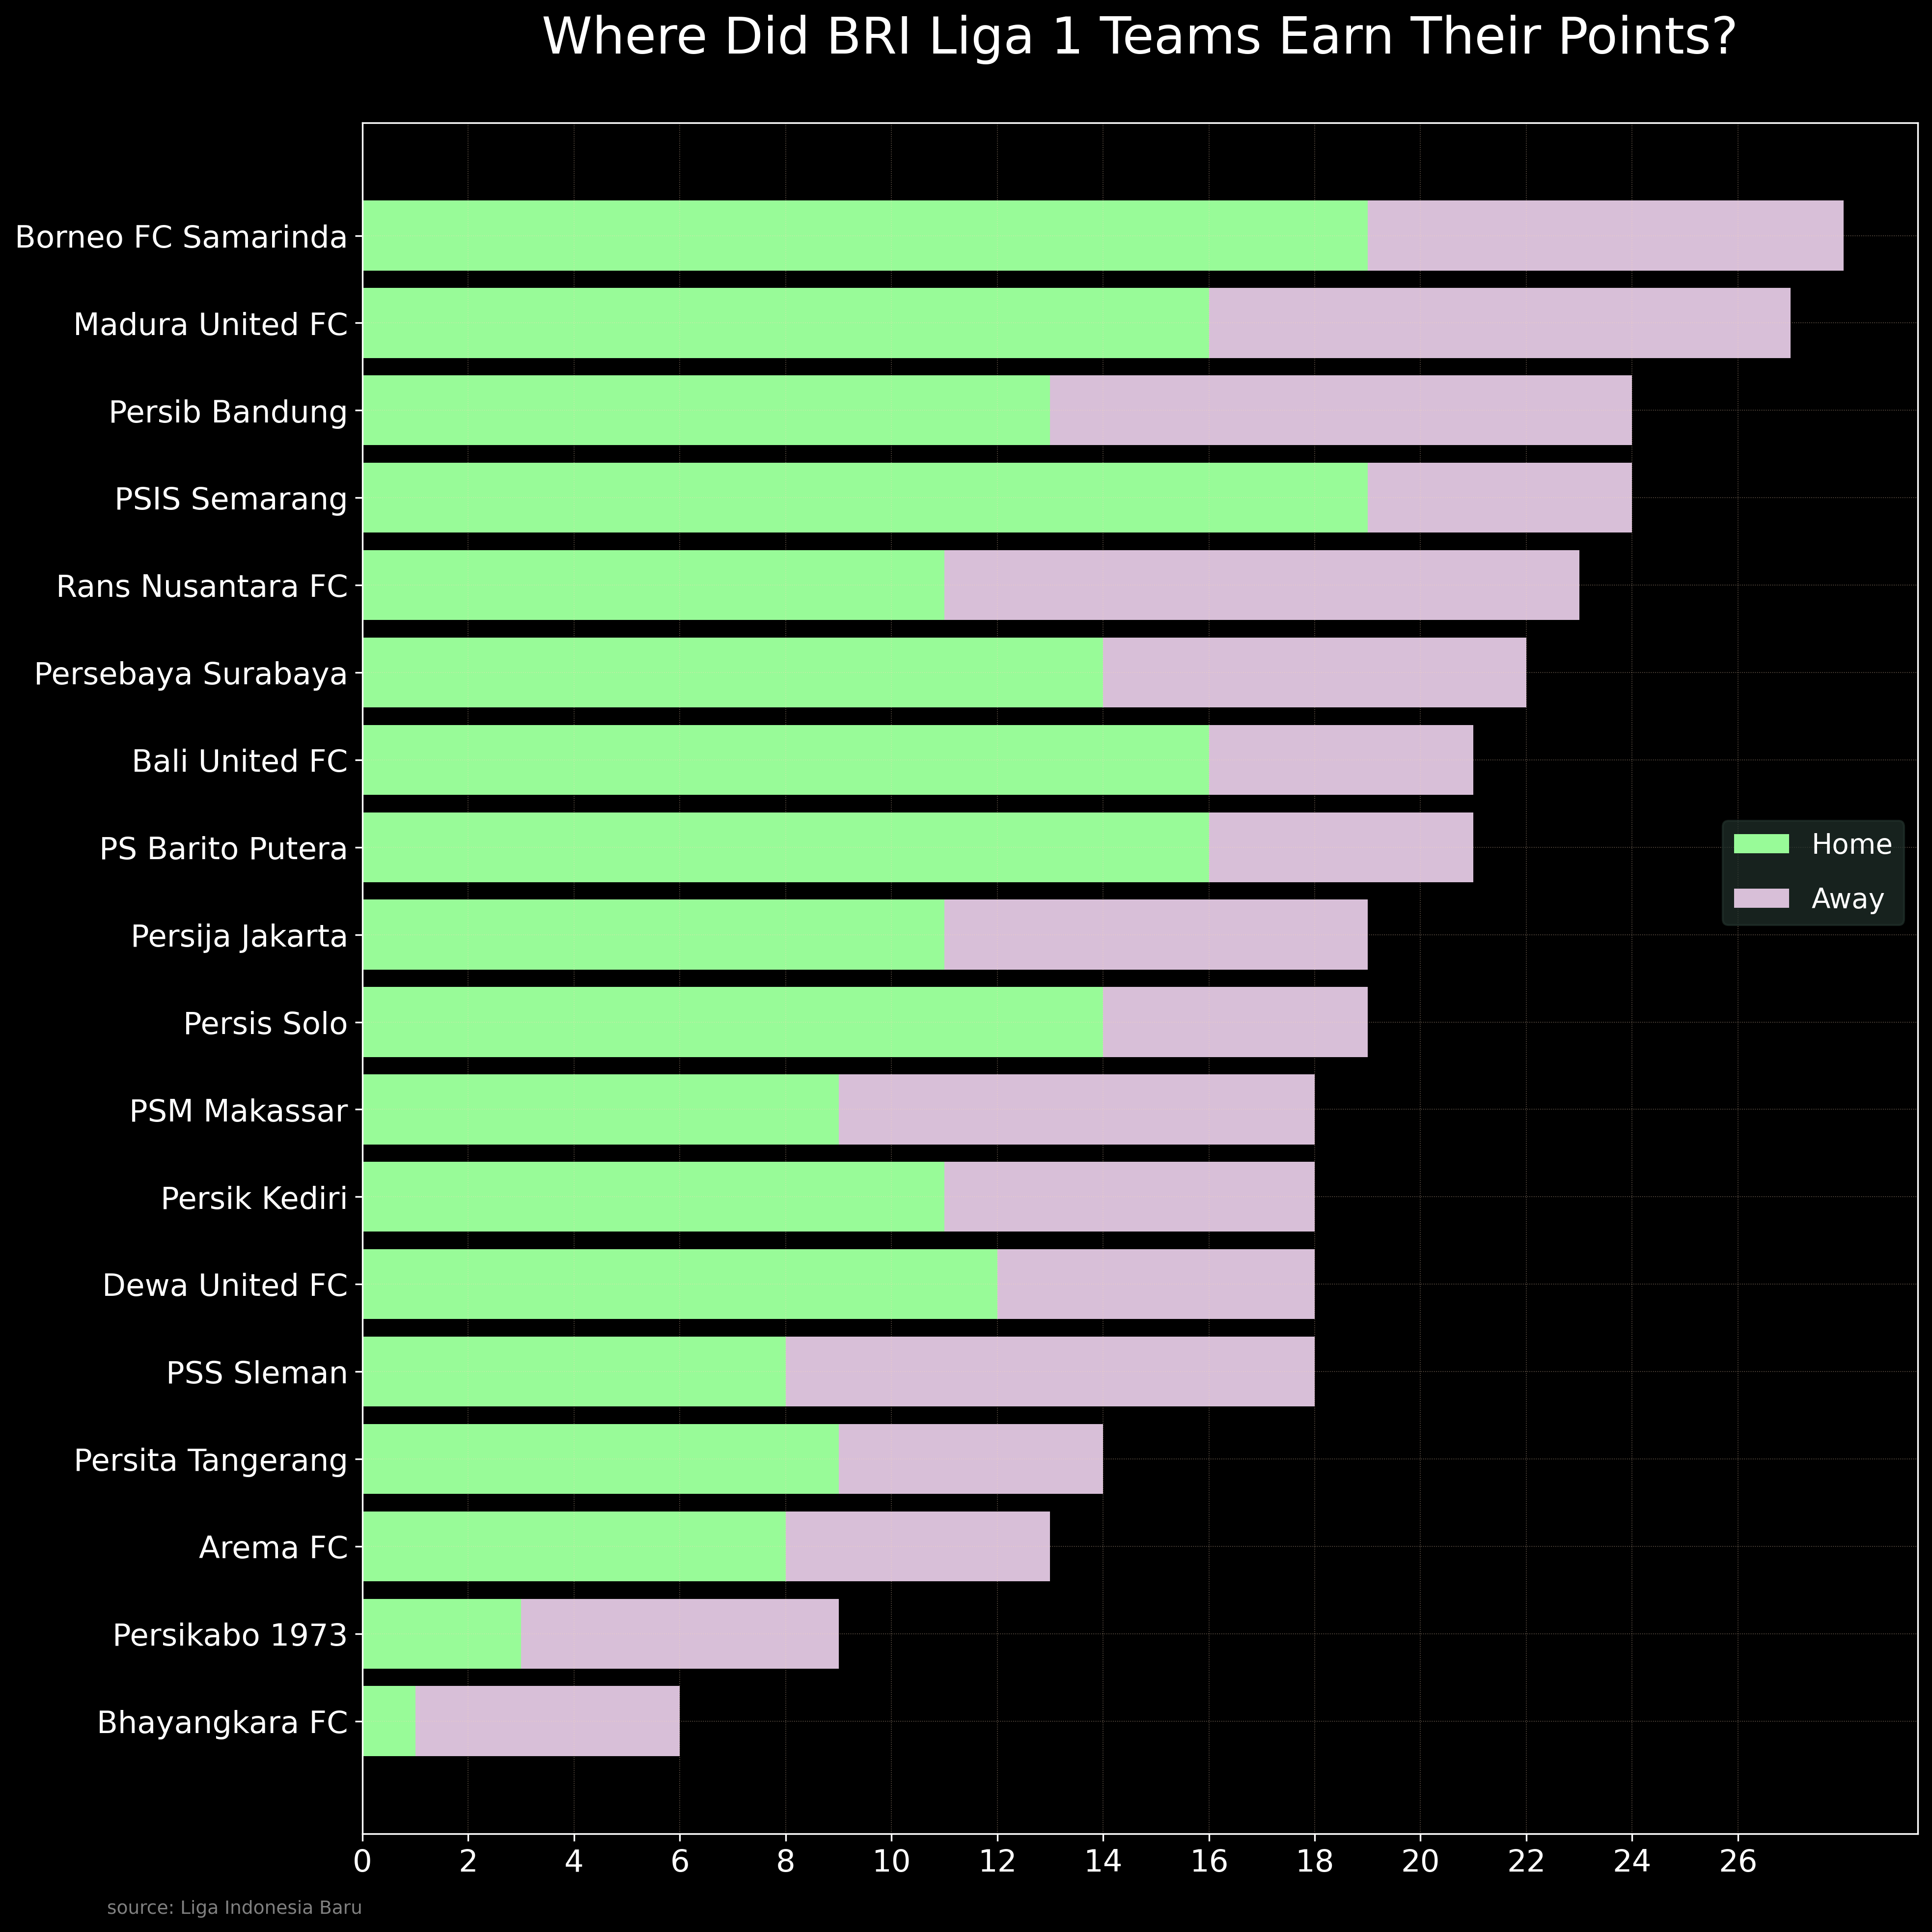

In [14]:
f1=p.figure(num=1, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, linestyle=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, yep['Home Points'], color='palegreen', label='Home')
p.barh(merg.Clubs, yep['Away Points'], left=yep['Home Points'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc='lower right', 
         facecolor='#22312b', edgecolor='#22312b', #(.8,.6)
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2),size=15)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Earn Their Points?\n", size=25, color='white')
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')


## standings breakdown

In [13]:
hpefr=[]
fhpefr=[]
apefr=[]
hpewdt=[]
fhpewdt=[]
apewdt=[]
iy=merg['Clubs'][6] # club's position
for i in (1, 7, 13):
    hmask=(df['home']==iy) & (df['away'].isin(merg['Clubs'].loc[i:(i+5)]))
    amask=(df['away']==iy) & (df['home'].isin(merg['Clubs'].loc[i:(i+5)]))
    mask=df.loc[hmask|amask]
    
    hpefr.append(mask.loc[mask['home']==iy]['hpoint'].sum())
    apefr.append(mask.loc[(mask['away']==iy)]['apoint'].sum())
    
    hpewdt.append(mask.loc[mask['home']==iy].shape[0]*3)
    apewdt.append(mask.loc[(mask['away']==iy)].shape[0]*3)

yasip = pd.DataFrame({
    'Club':iy,
    'Home Point 1-6':hpefr[0],
    'Home Point 7-12':hpefr[1],
    'Home Point 13-18':hpefr[2],
    'Home Width 1-6':hpewdt[0],
    'Home Width 7-12':hpewdt[1],
    'Home Width 13-18':hpewdt[2],
    'Away Point 1-6':apefr[0],
    'Away Point 7-12':apefr[1],
    'Away Point 13-18':apefr[2],
    'Away Width 1-6':apewdt[0],
    'Away Width 7-12':apewdt[1],
    'Away Width 13-18':apewdt[2],
}, index=[0])
yasip

,Club,Home Point 1-6,Home Point 7-12,Home Point 13-18,Home Width 1-6,Home Width 7-12,Home Width 13-18,Away Point 1-6,Away Point 7-12,Away Point 13-18,Away Width 1-6,Away Width 7-12,Away Width 13-18
0,Persebaya Surabaya,5,3,3,9,3,6,0,1,6,3,6,6


In [30]:
layout = [#["logo"] + ["club"] * 2,
          ["text"] * 3,
          ["pos"] + ["hbar"] + ["abar"],
          ["pos"] + ["hbar"] + ["abar"]]

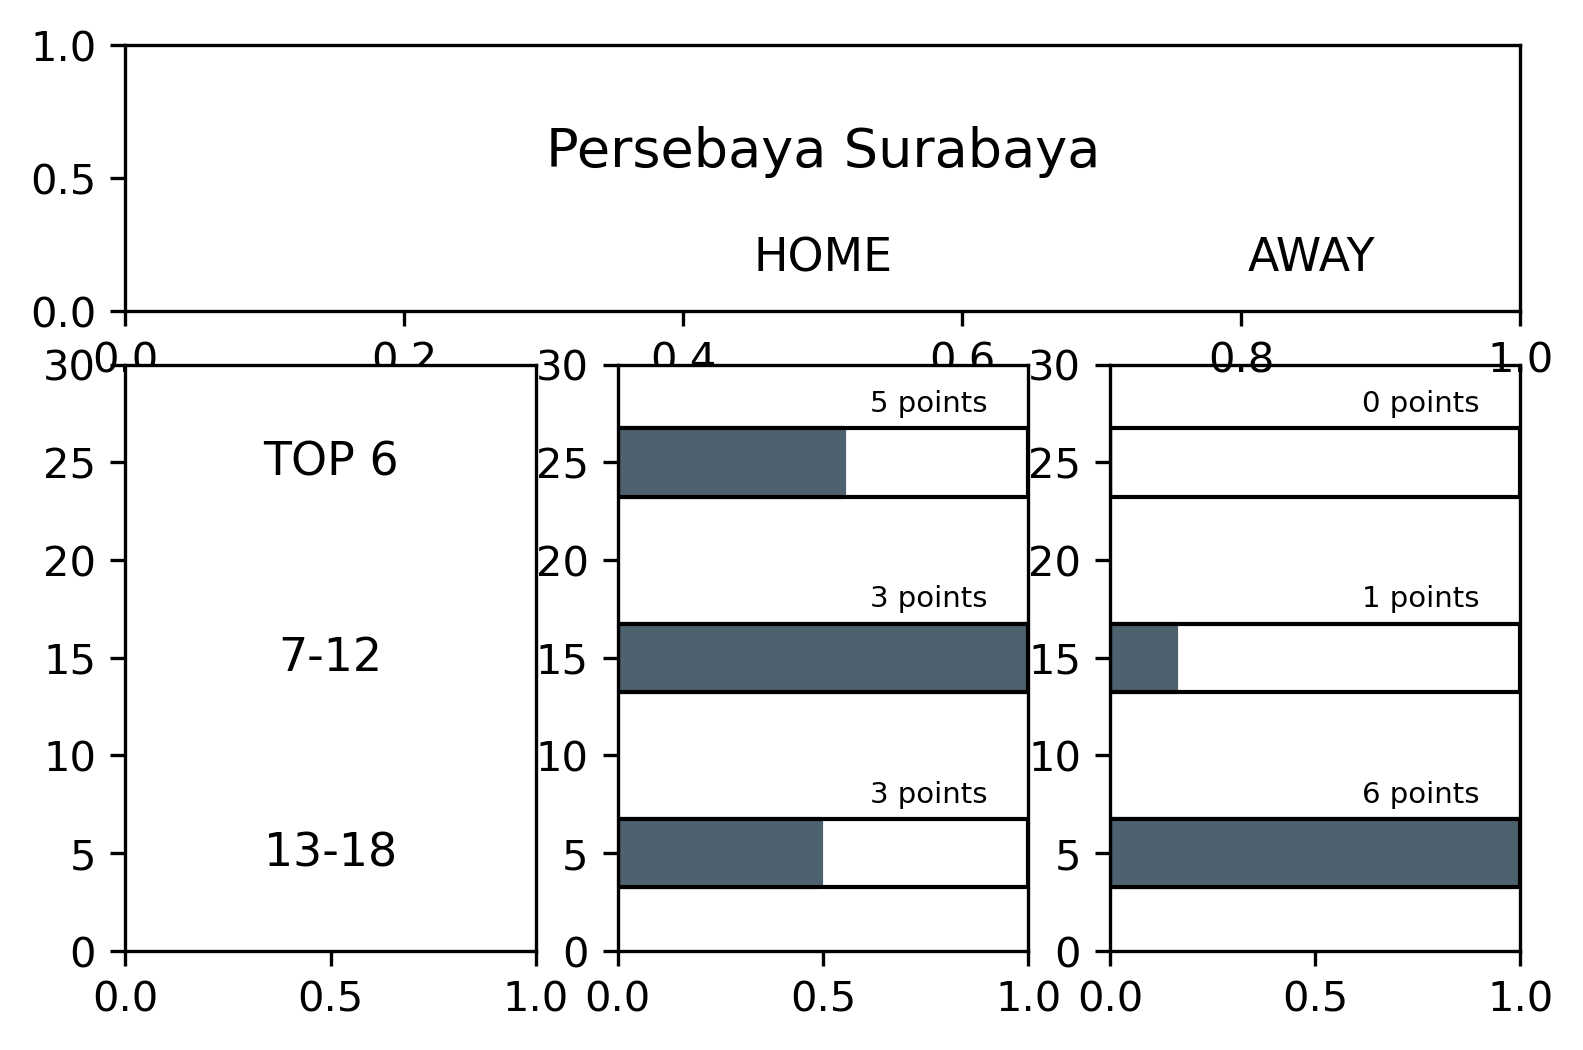

In [43]:
fig = p.figure(dpi=300, facecolor='white')

p.tight_layout(pad=.1)

ax_dict = fig.subplot_mosaic(
    layout
)
#for apa in ['text', 'pos', 'hbar', 'abar']:#
 #   ax_dict[apa].axis('off')

ax_dict['text'].annotate(
    xy = (.5,.6),
    text = iy,
    ha = 'center',
    va = 'center',
    size = 13
)

ax_dict["text"].annotate(
    xy = (.5,.2),
    text = "HOME",
    ha = "center",
    va = "center",
    size = 11
)
ax_dict["text"].annotate(
    xy = (.85,.2),
    text = "AWAY",
    ha = "center",
    va = "center",
    size = 11
)

ax_dict["pos"].set_ylim([0, 30])
ax_dict["pos"].annotate(
    xy = (.5,25),
    text = "TOP 6",
    ha = "center",
    va = "center",
    size = 11
)
ax_dict["pos"].annotate(
    xy = (.5,15),
    text = "7-12",
    ha = "center",
    va = "center",
    size = 11
)
ax_dict["pos"].annotate(
    xy = (.5,5),
    text = "13-18",
    ha = "center",
    va = "center",
    size = 11
)

ax_dict["hbar"].set_ylim([0, 30])
ax_dict["hbar"].set_xlim([0, 1])

ax_dict["abar"].set_ylim([0, 30])
ax_dict["abar"].set_xlim([0, 1])

for i, j in zip ([25, 15, 5], [0, 1, 2]):
    ax_dict["hbar"].barh(
        y = i,
        width = 1,
        height = 3.5,
        color = 'none',
        edgecolor = 'k'
        #linewidth = 1.3
    )
    ax_dict["hbar"].fill_between(
        x = [0,(hpefr[j]/hpewdt[j])-.005],
        y1 = i+1.75,
        y2 = i-1.75,
        color = '#4e616e'
    )
    ax_dict['hbar'].annotate(
        xy = (.9, (i + 2.3)),
        text = str(hpefr[j])+' points',
        ha = 'right',
        va = 'bottom',
        size = 7
    )

    ax_dict["abar"].barh(
        y = i,
        width = 1,
        height = 3.5,
        color = 'none',
        edgecolor = 'k'
    )
    ax_dict["abar"].fill_between(
        x = [0,(apefr[j]/apewdt[j])-.005],
        y1 = i+1.75,
        y2 = i-1.75,
        color = '#4e616e'
    )
    
    ax_dict['abar'].annotate(
        xy = (.9, (i + 2.3)),
        text = str(apefr[j])+' points',
        ha = 'right',
        va = 'bottom',
        size = 7
    )